In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [3]:
df=pd.read_csv('water_quality_dataset.csv')

In [4]:
df.rename(columns={'pH': 'PH'}, inplace=True)

In [5]:
df

PH    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0     7.294480  109.747445  149.580579     2.514424  158.686922    180.522185   
1     7.540417  130.701183  518.105852     2.134332  115.443943    752.190030   
2     8.680964  126.168636  179.931717     1.828736  185.755707    417.489011   
3     7.411797  160.169927  199.480251     1.596681  123.639254    442.419927   
4     6.978071  123.167662  299.739836     2.217796         NaN    598.551053   
...        ...         ...         ...          ...         ...           ...   
2995  7.919654  175.952537  422.382676     2.127819  129.151373    680.917040   
2996  8.287041  116.122304  441.454512     1.166615   85.469026    805.707004   
2997  8.220683  129.810193  221.504342     1.253733         NaN    356.233975   
2998  7.211526  128.430405  118.069081     2.022229  120.487352    124.134783   
2999  8.069236  187.594507  374.069349     1.360101         NaN    634.237190   

      Trihalomethanes  Turbidity  Potability  
0           68.732337   0.673900           1  
1           20.565890   0.657274           0  
2           36.511400   0.315273           0  
3           35.849044   0.000000           1  
4           54.565679   0.709806           1  
...               ...        ...         ...  
2995         8.185826   0.410432           1  
2996        24.318356   0.272758           1  
2997        44.877098   0.310676           1  
2998        18.508324   1.070627           0  
2999        40.624246   0.502383           1  

[3000 rows x 9 columns]

In [6]:
df.shape

(3000, 9)

In [7]:
df.head(15)

PH    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0   7.294480  109.747445  149.580579     2.514424  158.686922    180.522185   
1   7.540417  130.701183  518.105852     2.134332  115.443943    752.190030   
2   8.680964  126.168636  179.931717     1.828736  185.755707    417.489011   
3   7.411797  160.169927  199.480251     1.596681  123.639254    442.419927   
4   6.978071  123.167662  299.739836     2.217796         NaN    598.551053   
5   7.547604  126.839997  139.184858     1.572569  150.215876    306.160495   
6   8.333814  115.512987  167.223206     2.285883   82.398734    350.683200   
7   7.626562   67.106111  490.824010     1.731706         NaN    972.057225   
8   7.121962  107.985886  267.346587     1.060113         NaN    440.691932   
9   7.286794  125.144710  366.250865     1.632560  118.407151    567.635674   
10  7.138328  117.859340  101.374913     1.347796         NaN     70.325809   
11  7.040067   76.888672  308.695573     1.960200   52.345679    505.672074   
12  7.690810  130.535146  458.468008     1.690030  144.792510    799.327080   
13  7.122363  127.276407  202.307055     2.219165  131.207137    357.082350   
14  6.995832  110.618089  293.369563     2.655032  113.141534    611.564564   

    Trihalomethanes  Turbidity  Potability  
0         68.732337   0.673900           1  
1         20.565890   0.657274           0  
2         36.511400   0.315273           0  
3         35.849044   0.000000           1  
4         54.565679   0.709806           1  
5         22.577786   0.360650           1  
6         51.469331   0.096689           1  
7         31.950704   0.955361           1  
8         47.771545   0.000000           1  
9         19.976094   1.550701           0  
10        31.432632   0.803640           1  
11        50.658237   0.428955           1  
12        49.450422   0.584138           1  
13        14.589046   0.909616           1  
14        51.514436   0.000000           1

In [8]:
df.describe()

PH     Hardness       Solids  Chloramines      Sulfate  \
count  3000.000000  3000.000000  3000.000000  3000.000000  2700.000000   
mean      7.503281   125.080600   275.948148     1.747963   124.375775   
std       0.523495    30.021276    98.092166     0.498999    48.823588   
min       5.617511     0.504575     0.000000     0.000000     0.000000   
25%       7.151525   104.927795   210.658319     1.417653    89.367794   
50%       7.509046   125.063401   274.517483     1.753245   122.862236   
75%       7.857998   144.597133   340.988765     2.081693   157.927523   
max       9.277582   218.298320   680.643134     3.301839   269.101704   

       Conductivity  Trihalomethanes    Turbidity  Potability  
count   3000.000000      3000.000000  3000.000000  3000.00000  
mean     501.239705        40.518283     0.531423     0.76200  
std      197.012546        19.594077     0.429490     0.42593  
min        0.000000         0.000000     0.000000     0.00000  
25%      366.930313        26.441332     0.152925     1.00000  
50%      500.752914        40.058070     0.481425     1.00000  
75%      632.537946        54.051806     0.832892     1.00000  
max     1225.999105       109.483767     2.143298     1.00000

In [9]:
df.isnull().sum()

PH                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            300
Conductivity         0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

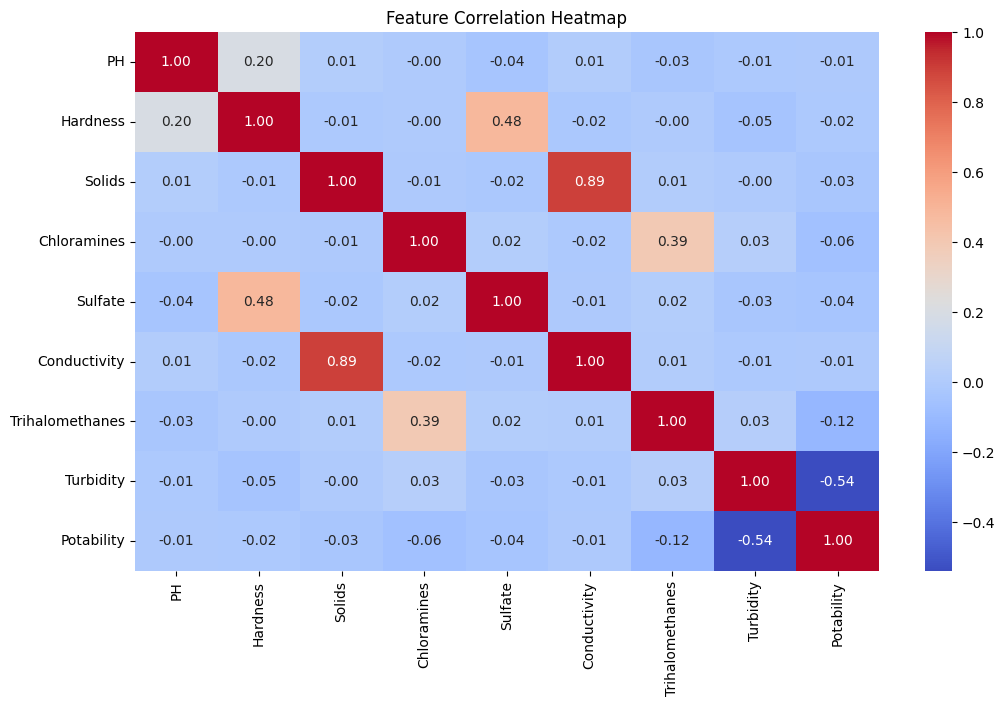

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
df.head()

PH    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0  7.294480  109.747445  149.580579     2.514424  158.686922    180.522185   
1  7.540417  130.701183  518.105852     2.134332  115.443943    752.190030   
2  8.680964  126.168636  179.931717     1.828736  185.755707    417.489011   
3  7.411797  160.169927  199.480251     1.596681  123.639254    442.419927   
4  6.978071  123.167662  299.739836     2.217796         NaN    598.551053   

   Trihalomethanes  Turbidity  Potability  
0        68.732337   0.673900           1  
1        20.565890   0.657274           0  
2        36.511400   0.315273           0  
3        35.849044   0.000000           1  
4        54.565679   0.709806           1

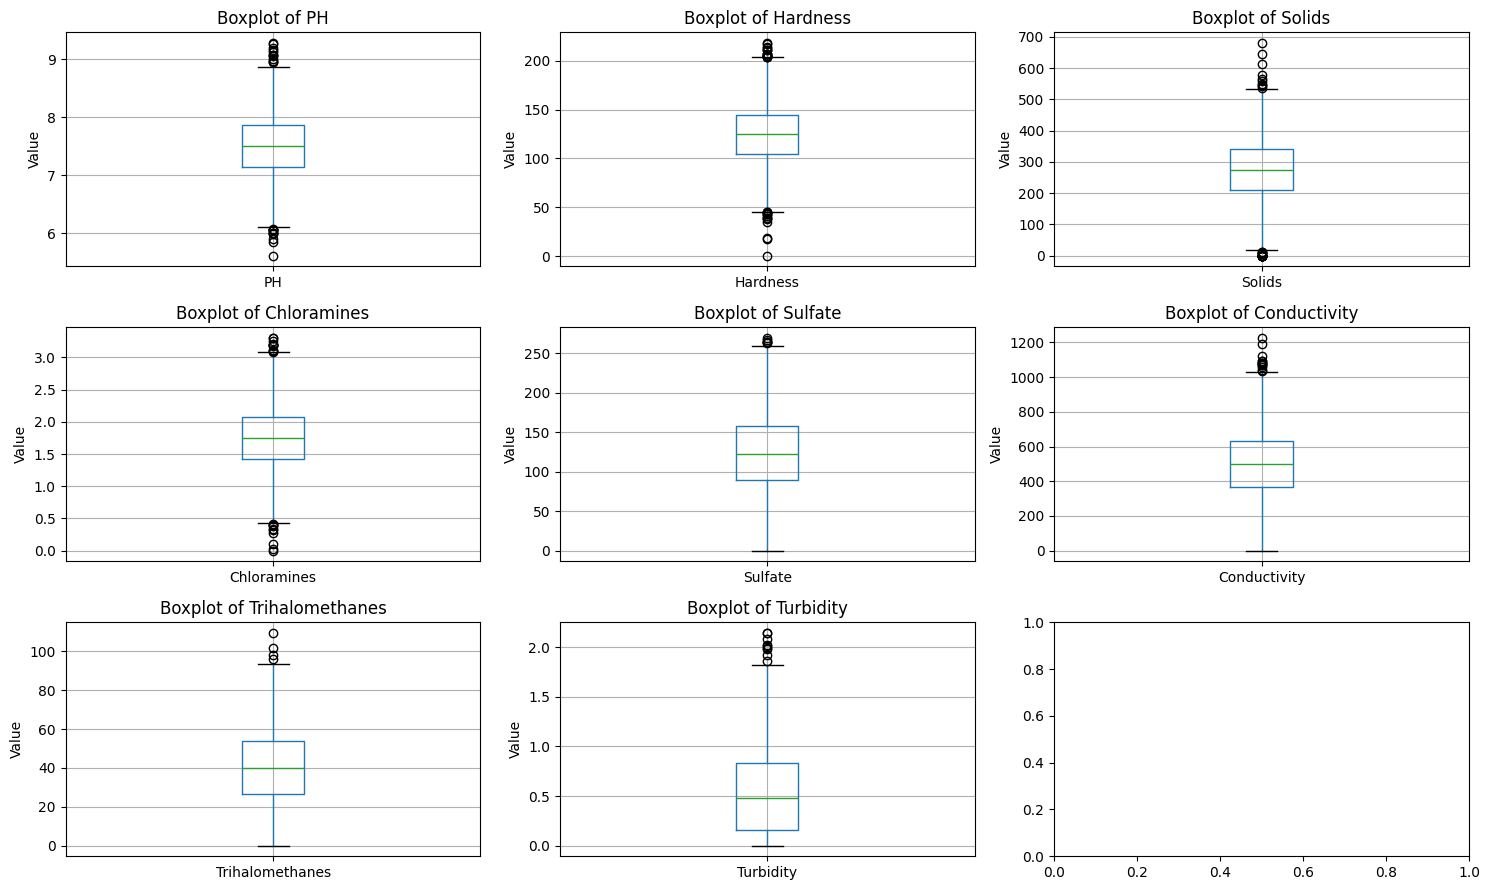

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(df.columns.drop('Potability')):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [13]:
# Remove outliers using the IQR method for each numeric column except 'Potability'
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Potability')
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep rows within 1.5*IQR for each feature
df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.reset_index(drop=True, inplace=True)
df=df_no_outliers
df

PH    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0     7.294480  109.747445  149.580579     2.514424  158.686922    180.522185   
1     7.540417  130.701183  518.105852     2.134332  115.443943    752.190030   
2     8.680964  126.168636  179.931717     1.828736  185.755707    417.489011   
3     7.411797  160.169927  199.480251     1.596681  123.639254    442.419927   
4     6.978071  123.167662  299.739836     2.217796         NaN    598.551053   
...        ...         ...         ...          ...         ...           ...   
2871  7.919654  175.952537  422.382676     2.127819  129.151373    680.917040   
2872  8.287041  116.122304  441.454512     1.166615   85.469026    805.707004   
2873  8.220683  129.810193  221.504342     1.253733         NaN    356.233975   
2874  7.211526  128.430405  118.069081     2.022229  120.487352    124.134783   
2875  8.069236  187.594507  374.069349     1.360101         NaN    634.237190   

      Trihalomethanes  Turbidity  Potability  
0           68.732337   0.673900           1  
1           20.565890   0.657274           0  
2           36.511400   0.315273           0  
3           35.849044   0.000000           1  
4           54.565679   0.709806           1  
...               ...        ...         ...  
2871         8.185826   0.410432           1  
2872        24.318356   0.272758           1  
2873        44.877098   0.310676           1  
2874        18.508324   1.070627           0  
2875        40.624246   0.502383           1  

[2876 rows x 9 columns]

In [14]:
df.isnull().sum()

PH                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            290
Conductivity         0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [15]:
df = df.round(2)


In [16]:

df.isnull().sum()

PH                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            290
Conductivity         0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [17]:

df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())
df['Sulfate']=df['Sulfate'].round(2)


In [18]:
df.sample(10)

PH  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
770   7.51    138.92  105.53         1.63   139.57        202.34   
2128  7.20    119.75  251.55         2.18   135.43        504.32   
2225  7.75     82.19  382.84         1.18    86.29        763.94   
431   7.98    122.57  358.30         1.99   165.14        616.98   
1441  6.77     97.86  317.07         1.95    80.48        515.41   
2523  7.39    102.25  297.41         2.00     1.59        465.63   
1848  7.74     97.81  174.51         1.65    45.55        290.62   
1788  7.28     52.29  259.17         0.53    73.60        617.63   
1110  7.42     80.10  207.31         0.82   103.99        354.91   
1902  7.21    121.46  367.26         1.89   155.83        914.00   

      Trihalomethanes  Turbidity  Potability  
770             21.79       0.00           1  
2128             5.98       1.35           0  
2225            13.85       0.44           1  
431             46.19       1.04           0  
1441            75.57       0.00           1  
2523            45.17       0.00           1  
1848            27.25       1.06           0  
1788            46.36       0.16           1  
1110             0.00       0.35           1  
1902            62.83       1.26           0

In [19]:
df.isnull().sum()

PH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

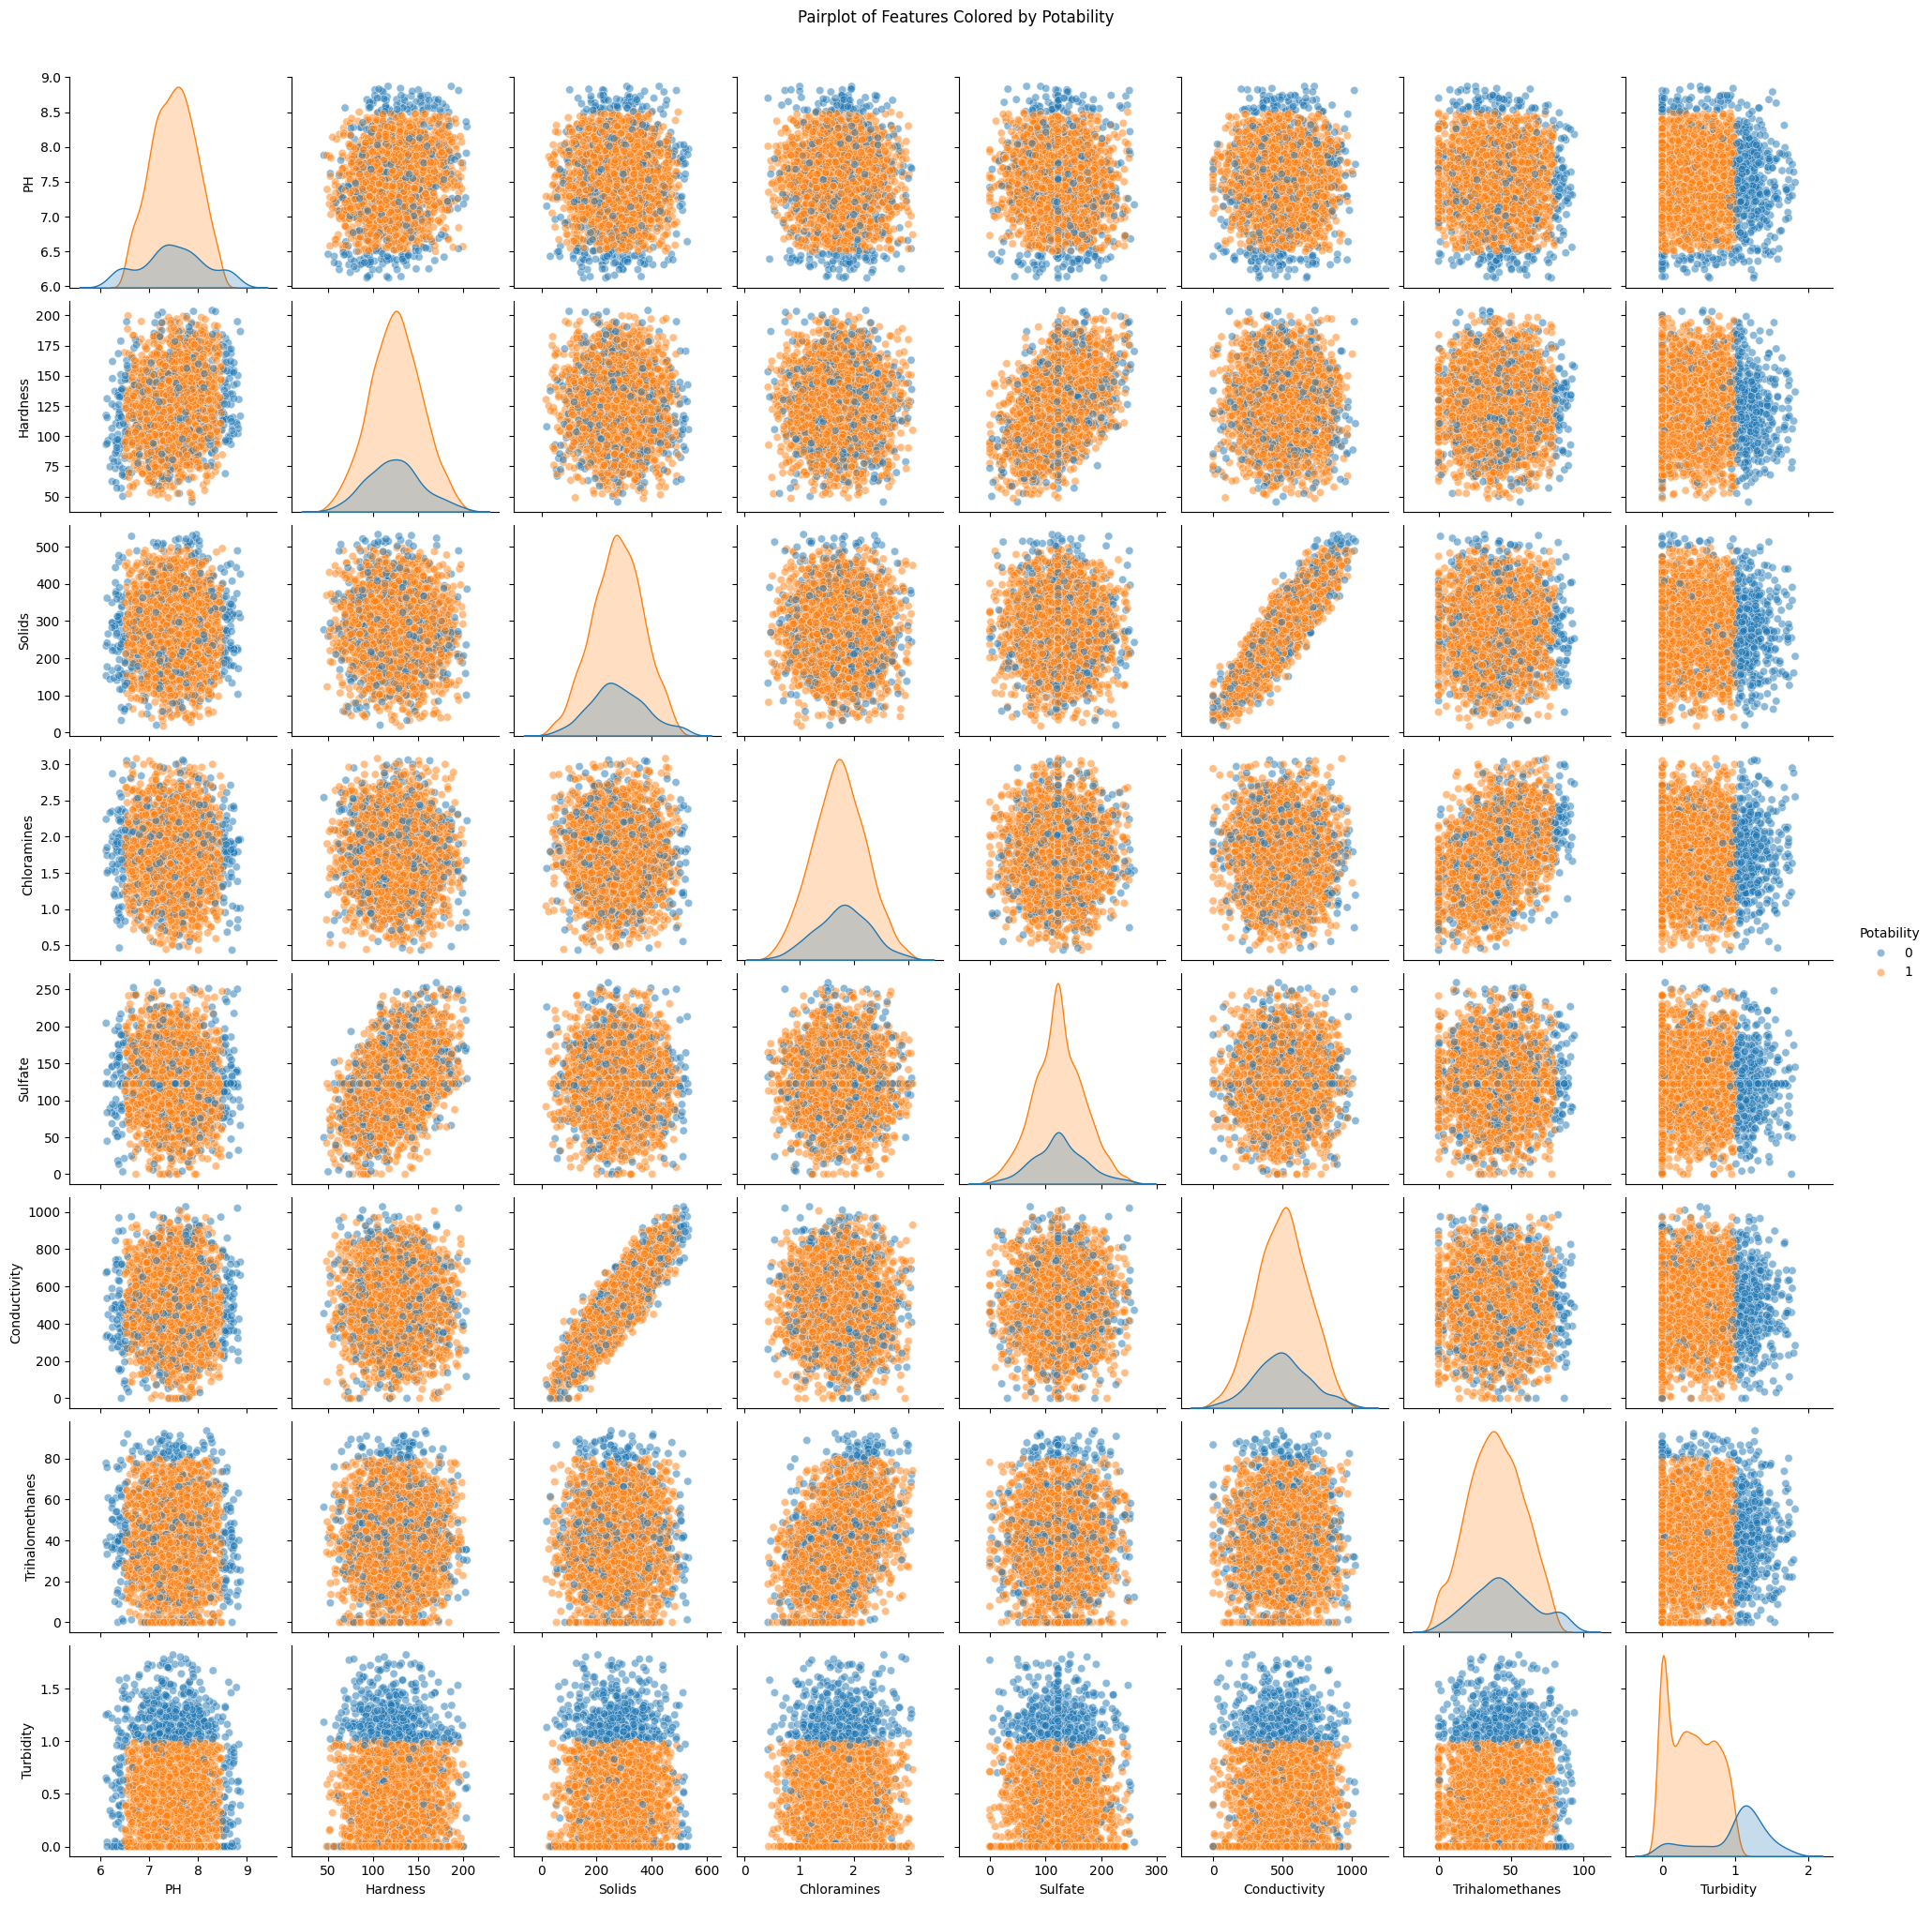

In [20]:
sns.pairplot(df, hue="Potability", plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Features Colored by Potability", y=1.02)
plt.show()

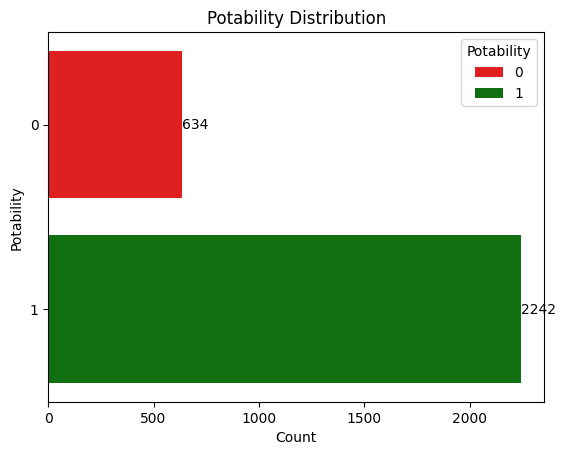

In [21]:
ax = sns.countplot(y='Potability', data=df, palette=['Red','Green'],hue='Potability')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Potability Distribution')
plt.xlabel('Count')
plt.ylabel('Potability')
plt.show()




In [22]:
df['Potability'].value_counts()

Potability
1    2242
0     634
Name: count, dtype: int64

In [42]:
df.shape

(2876, 9)

## Split the data for training and testing

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Potability',axis=1),df['Potability'],test_size=0.2,random_state=42)

In [24]:

df['Potability'].value_counts()

Potability
1    2242
0     634
Name: count, dtype: int64

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train, x_test)
# X_train_scaled  = scaler.transform(x_train)
# X_test_scaled  = scaler.transform(x_test)

In [26]:
X=df.drop('Potability',axis=1)

In [27]:
x_test


PH  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
612   7.75    101.95  247.48         1.91   152.49        443.79   
1880  7.43    137.95  330.83         2.35   108.76        545.75   
1357  7.72    159.32  367.44         2.26   209.85        679.11   
2611  8.83    106.33  171.58         1.95    32.41        202.99   
1047  7.06    138.73  162.27         1.07   165.93        295.70   
...    ...       ...     ...          ...      ...           ...   
1956  7.71    140.05  290.24         1.16   178.65        390.66   
163   7.57    128.20  339.01         1.97   122.54        728.68   
1918  6.69    172.93  255.54         1.71   178.65        342.47   
252   8.27    121.76  150.44         1.74    60.41        543.52   
1805  7.11    116.99  296.73         0.94   122.54        545.77   

      Trihalomethanes  Turbidity  
612             30.62       0.59  
1880            20.48       0.36  
1357            48.41       0.74  
2611            63.12       0.62  
1047            30.07       0.57  
...               ...        ...  
1956            12.20       0.33  
163             24.66       0.00  
1918            63.46       1.09  
252             80.35       0.26  
1805             9.86       0.81  

[576 rows x 8 columns]

# Model Comparison: Random Forest vs XGBoost vs Logistic Regression
We will train and evaluate Random Forest , XGBoost classifiers and Logistic Regression to determine the best model for water quality estimation.

## Logistic Regression

In [28]:
lor=LogisticRegression(max_iter=5000)

In [29]:
lor.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [30]:
y_pred=lor.predict(x_test)


In [31]:
# Evaluate Logistic Regression
lor_acc = accuracy_score(y_test, y_pred)
lor_f1 = f1_score(y_test, y_pred)
lor_roc = roc_auc_score(y_test, y_pred)
print('Logistic Regression Results:')
print(f'Accuracy: {lor_acc:.4f}')
print(f'F1 Score: {lor_f1:.4f}')
print(f'ROC-AUC: {lor_roc:.4f}')
print(classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.9201
F1 Score: 0.9507
ROC-AUC: 0.8346
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       126
           1       0.92      0.99      0.95       450

    accuracy                           0.92       576
   macro avg       0.93      0.83      0.87       576
weighted avg       0.92      0.92      0.92       576



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

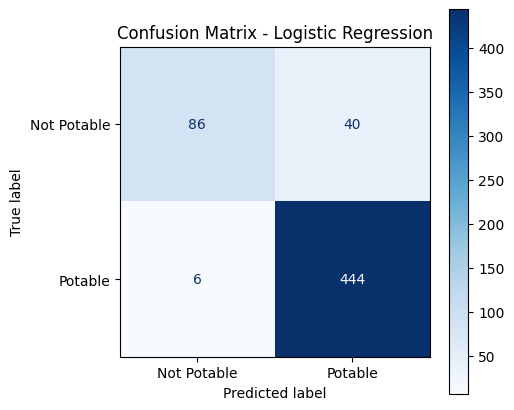

In [32]:
#Confusion Matrix for Logistic Regression
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Not Potable', 'Potable'])
fig,ax=plt.subplots(figsize=(5,5))
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')

In [33]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,

## Random Forest

In [34]:

from sklearn.ensemble import RandomForestClassifier


# Train Random Forest
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf1.fit(x_train, y_train)
rf_pred = rf1.predict(x_test)

# Evaluate Random Forest
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc = roc_auc_score(y_test, rf_pred)
print('Random Forest Results:')
print(f'Accuracy: {rf_acc:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'ROC-AUC: {rf_roc:.4f}')
print(classification_report(y_test, rf_pred))




Random Forest Results:
Accuracy: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       450

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



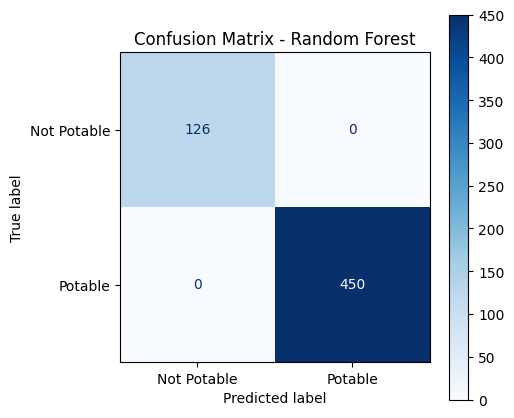

In [35]:


# Compute confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Potable', 'Potable'])
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## XGBoost

In [36]:

from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

# Evaluate XGBoost
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc = roc_auc_score(y_test, xgb_pred)
print('XGBoost Results:')
print(f'Accuracy: {xgb_acc:.4f}')
print(f'F1 Score: {xgb_f1:.4f}')
print(f'ROC-AUC: {xgb_roc:.4f}')
print(classification_report(y_test, xgb_pred))

XGBoost Results:
Accuracy: 0.9931
F1 Score: 0.9956
ROC-AUC: 0.9870
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       126
           1       0.99      1.00      1.00       450

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:43:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


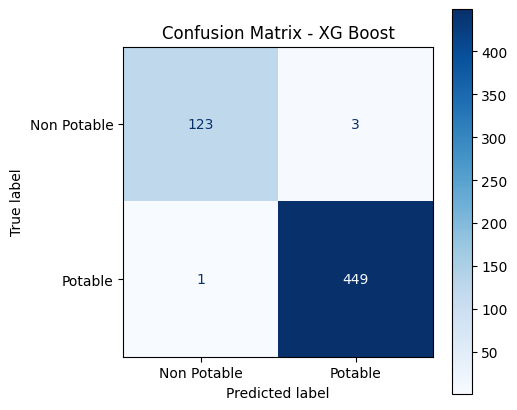

In [37]:
cm=confusion_matrix(y_test,xgb_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Non Potable','Potable'])
fig,ax=plt.subplots(figsize=(5,5))
cmd.plot(ax=ax,cmap='Blues',values_format='d')
plt.title('Confusion Matrix - XG Boost')
plt.show()

In [38]:
xgb_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [39]:
# Compare and select the best model
print('--- Model Comparison ---')
print(f'Random Forest:       Accuracy={rf_acc:.4f}, F1={rf_f1:.4f}, ROC-AUC={rf_roc:.4f}')
print(f'XGBoost:             Accuracy={xgb_acc:.4f}, F1={xgb_f1:.4f}, ROC-AUC={xgb_roc:.4f}')
print(f'Logistic Regression: Accuracy={lor_acc:.4f}, F1={lor_f1:.4f}, ROC-AUC={lor_roc:.4f}')

if xgb_roc > rf_roc and xgb_roc > lor_roc:
    best_model = 'XGBoost'
elif rf_roc > xgb_roc and rf_roc > lor_roc:
    best_model = 'Random Forest'
else:
    best_model = 'Logistic Regression'
print(f'Best model for water quality estimation: {best_model}')

--- Model Comparison ---
Random Forest:       Accuracy=1.0000, F1=1.0000, ROC-AUC=1.0000
XGBoost:             Accuracy=0.9931, F1=0.9956, ROC-AUC=0.9870
Logistic Regression: Accuracy=0.9201, F1=0.9507, ROC-AUC=0.8346
Best model for water quality estimation: Random Forest


In [40]:
import pickle
# Save the trained Random Forest model as a pickle file
with open('water_quality_rf_model.pkl', 'wb') as f:
    pickle.dump(rf1, f)
print('Random forest model saved as water_quality_rf_model.pkl')

Random forest model saved as water_quality_rf_model.pkl


In [41]:
df


PH  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     7.29    109.75  149.58         2.51   158.69        180.52   
1     7.54    130.70  518.11         2.13   115.44        752.19   
2     8.68    126.17  179.93         1.83   185.76        417.49   
3     7.41    160.17  199.48         1.60   123.64        442.42   
4     6.98    123.17  299.74         2.22   122.54        598.55   
...    ...       ...     ...          ...      ...           ...   
2871  7.92    175.95  422.38         2.13   129.15        680.92   
2872  8.29    116.12  441.45         1.17    85.47        805.71   
2873  8.22    129.81  221.50         1.25   122.54        356.23   
2874  7.21    128.43  118.07         2.02   120.49        124.13   
2875  8.07    187.59  374.07         1.36   122.54        634.24   

      Trihalomethanes  Turbidity  Potability  
0               68.73       0.67           1  
1               20.57       0.66           0  
2               36.51       0.32           0  
3               35.85       0.00           1  
4               54.57       0.71           1  
...               ...        ...         ...  
2871             8.19       0.41           1  
2872            24.32       0.27           1  
2873            44.88       0.31           1  
2874            18.51       1.07           0  
2875            40.62       0.50           1  

[2876 rows x 9 columns]